### train, test data

In [26]:
import pandas as pd
train_df = pd.read_csv("train.csv",nrows=2000)

unused_columns,label_column = ["id","hour","device_id","device_ip"],"click"
train_df = train_df.drop(unused_columns,axis=1)
X_dict_train = list(train_df.drop(label_column,axis=1).T.to_dict().values())
y_train = train_df[label_column]

test_df = pd.read_csv("train.csv",header=0,skiprows=(1,2001),nrows=2000)
test_df = test_df.drop(unused_columns,axis=1)
X_dict_test = list(test_df.drop(label_column,axis=1).T.to_dict().values())
y_test = test_df[label_column]

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=True)

X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.fit_transform(X_dict_test)

## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
parameters={"max_depth":[3,10,None]}
decision_tree = DecisionTreeClassifier(criterion="gini",min_samples_split=30)

from sklearn.model_selection import GridSearchCV
grid_search1 = GridSearchCV(decision_tree, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search1.fit(X_train,y_train)
# grid_search1.best_params_


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [89]:
decision_tree_best = grid_search1.best_estimator_

In [90]:
y_pred_dc = decision_tree_best.predict(X_test)
y_pred_dc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_dc = decision_tree_best.predict_proba(X_test)[:,1]
y_pred_proba_dc

array([0.18527607, 0.18527607, 0.18527607, ..., 0.0718232 , 0.0718232 ,
       0.0718232 ])

In [117]:
fpr_dc,tpr_dc,_=roc_curve(y_test,y_pred_proba_dc)
auc1 = roc_auc_score(y_test, y_pred_proba_dc)
auc1 

0.7222000913127389

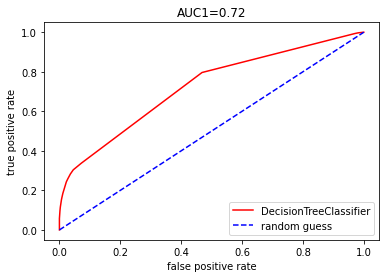

In [118]:
import matplotlib.pyplot as plt

plt.plot(fpr_dc,tpr_dc,"r-",label = "DecisionTreeClassifier")
plt.plot([0,1],[0,1],"b--",label = "random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC1={0:.2f}".format(auc1))
plt.legend(loc="lower right")

### Randomforest

In [94]:
from sklearn.ensemble import RandomForestClassifier
parameters={"max_depth":[3,10,None]}
rf = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=30,n_jobs=-1)

from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(rf,parameters,n_jobs=-1,cv=3,scoring="roc_auc")
grid_search2.fit(X_train,y_train)
#grid_search2.best_params_

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             scoring='roc_auc')

In [95]:
rf_best = grid_search.best_estimator_

In [96]:
y_pred_rf = rf_best.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_rf = rf_best.predict_proba(X_test)[:,1]
y_pred_proba_rf

array([0.18148761, 0.08188762, 0.19581011, ..., 0.10176484, 0.04659263,
       0.02820158])

In [119]:
fpr_rf,tpr_rf,_=roc_curve(y_test,y_pred_proba_rf)
auc2 = roc_auc_score(y_test, y_pred_proba_rf)
auc2 

0.9271162454821112

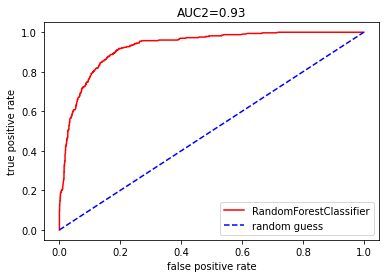

In [120]:
import matplotlib.pyplot as plt

plt.plot(fpr_rf,tpr_rf,"r-",label = "RandomForestClassifier")
plt.plot([0,1],[0,1],"b--",label = "random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC2={0:.2f}".format(auc2))
plt.legend(loc="lower right")

### knn

In [130]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[1,2,3,4,5]}
knn = KNeighborsClassifier()
#knn.fit(X_train,y_train)
from sklearn.model_selection import GridSearchCV
grid_search3 = GridSearchCV(knn,parameters,n_jobs=-1,cv=3,scoring="roc_auc")
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='roc_auc')

In [131]:
knn_best = grid_search3.best_estimator_

In [132]:
y_pred_knn = knn_best.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_knn = knn_best.predict_proba(X_test)[:,1]
y_pred_proba_knn

array([0., 0., 0., ..., 0., 0., 0.])

In [134]:
fpr_knn,tpr_knn,_=roc_curve(y_test,y_pred_proba_knn)
auc3 = roc_auc_score(y_test, y_pred_proba_knn)
auc3

0.8751134588064953

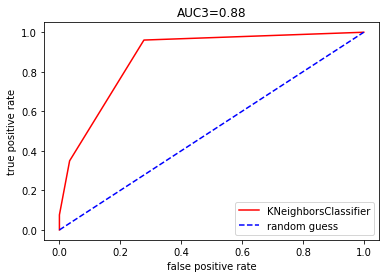

In [135]:
import matplotlib.pyplot as plt

plt.plot(fpr_knn,tpr_knn,"r-",label = "KNeighborsClassifier")
plt.plot([0,1],[0,1],"b--",label = "random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC3={0:.2f}".format(auc3))
plt.legend(loc="lower right")

### logistic

In [142]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
#logic.fit(X_train,y_train)
parameters = {'C':[0.001,0.01,0.1,1,10],'penalty':['l2','l1']}

from sklearn.model_selection import GridSearchCV
grid_search4 = GridSearchCV(logic,parameters,n_jobs=-1,cv=3,scoring='roc_auc')
grid_search4.fit(X_train,y_train)

C:\Users\687\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.6203432         nan 0.62038668        nan 0.62020675        nan
 0.62720879        nan 0.62032643        nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1']},
             scoring='roc_auc')

In [143]:
logic_best = grid_search4.best_estimator_

In [144]:
y_pred_logic = logic_best.predict(X_test)
y_pred_logic

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_logic = logic_best.predict_proba(X_test)[:,1]
y_pred_proba_logic

array([0.14624431, 0.14624112, 0.14624619, ..., 0.14808227, 0.10462121,
       0.15659982])

In [146]:
fpr_logic,tpr_logic,_=roc_curve(y_test,y_pred_proba_logic)
auc4 = roc_auc_score(y_test, y_pred_proba_logic)
auc4

0.6427952975758469

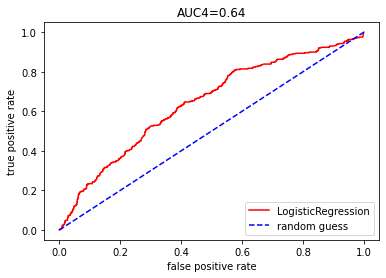

In [141]:
import matplotlib.pyplot as plt

plt.plot(fpr_logic,tpr_logic,"r-",label = "LogisticRegression")
plt.plot([0,1],[0,1],"b--",label = "random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC4={0:.2f}".format(auc4))
plt.legend(loc="lower right")

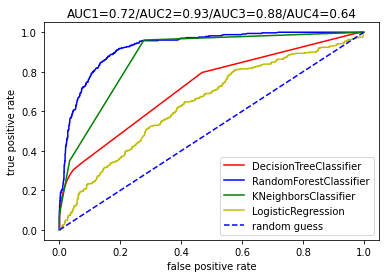

In [147]:
plt.plot(fpr_dc, tpr_dc, 'r-',label='DecisionTreeClassifier')
plt.plot(fpr_rf, tpr_rf, 'b-',label='RandomForestClassifier')
plt.plot(fpr_knn, tpr_knn, 'g-',label='KNeighborsClassifier')
plt.plot(fpr_logic, tpr_logic, 'y-',label='LogisticRegression')
plt.plot([0, 1],[0, 1],'b--',label='random guess')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC1={0:.2f}/AUC2={1:.2f}/AUC3={2:.2f}/AUC4={3:.2f}'.format(auc1,auc2, auc3, auc4))
plt.legend(loc='lower right')